# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [99]:
data1 = pd.read_csv('50_Startups.csv')

In [100]:
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [101]:
data1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


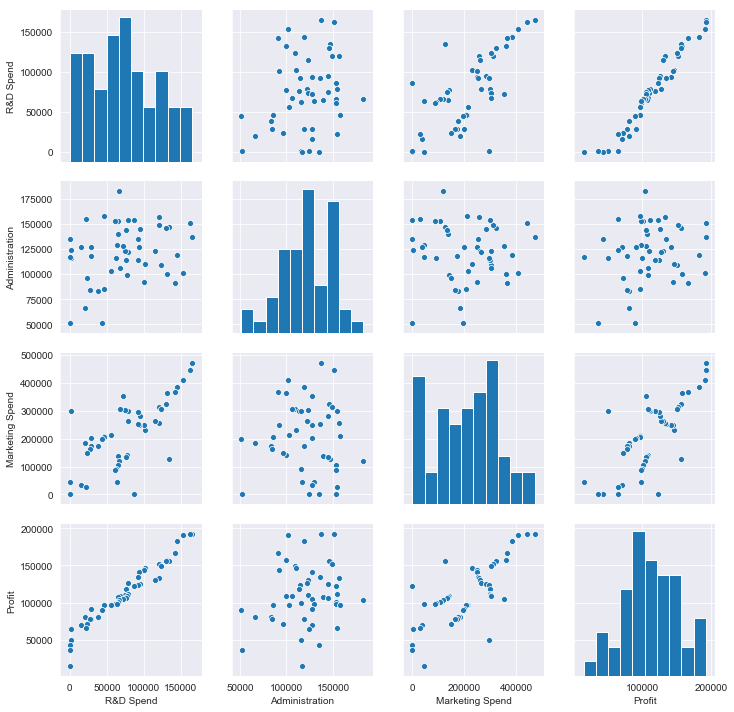

In [102]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [103]:
data2 = data1.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)

In [104]:
data2.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [105]:
model = smf.ols('Profit~Marketing_Spend+Administration+RD_Spend',data=data2).fit()

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           4.53e-30
Time:                        14:08:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model.params

Intercept          50122.192990
Marketing_Spend        0.027228
Administration        -0.026816
RD_Spend               0.805715
dtype: float64

In [108]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
Marketing_Spend     1.655077
Administration     -0.525507
RD_Spend           17.846374
dtype: float64 
 Intercept          1.057379e-09
Marketing_Spend    1.047168e-01
Administration     6.017551e-01
RD_Spend           2.634968e-22
dtype: float64


In [109]:
model1 = smf.ols('Profit~Administration',data=data2).fit()

In [110]:
model1.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [111]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 20 Aug 2021   Prob (F-statistic):              0.162
Time:                        14:08:33   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#vif_caluculation
rsq_ms = smf.ols('Marketing_Spend~Administration+RD_Spend',data=data2).fit().rsquared
vif_ms=1/(1-rsq_ms)
rsq_rs = smf.ols('RD_Spend~Marketing_Spend+Administration',data=data2).fit().rsquared
vif_rs=1/(1-rsq_rs)
rsq_ad = smf.ols('Administration~Marketing_Spend+RD_Spend',data=data2).fit().rsquared
vif_ad=1/(1-rsq_ad)
d1 = {'Variables':['Marketing_Spend','RD_Spend','Administration'],'VIF':[vif_ms,vif_rs,vif_ad]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Marketing_Spend,2.326773
1,RD_Spend,2.468903
2,Administration,1.175091


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


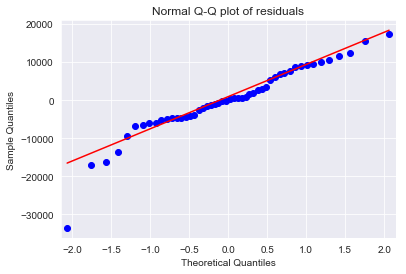

In [113]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [114]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

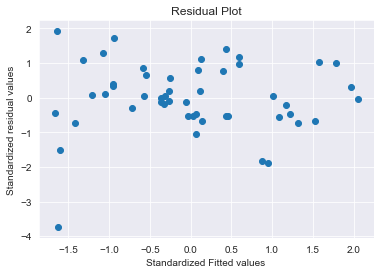

In [115]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [116]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

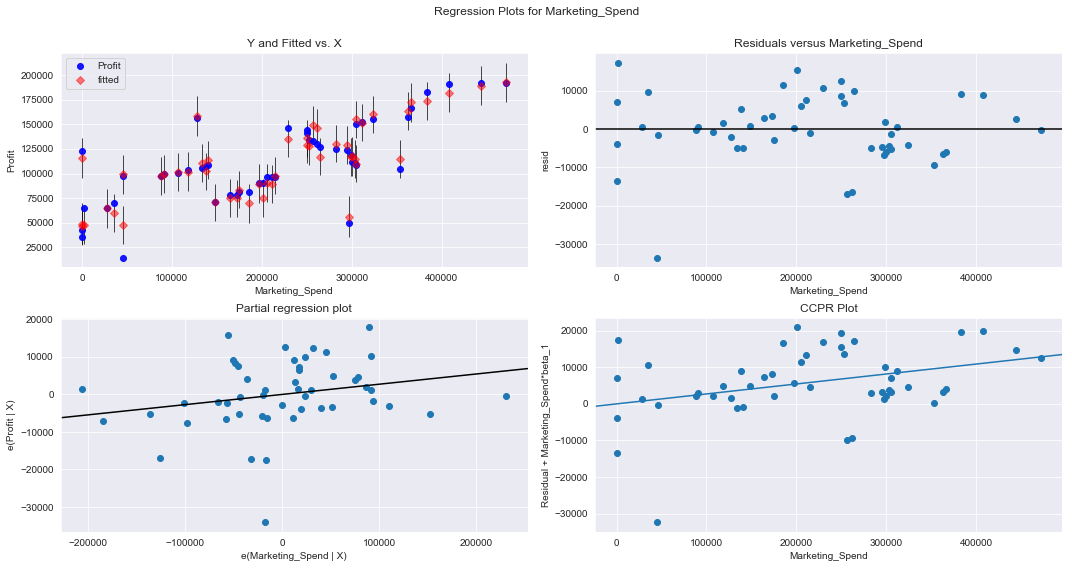

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

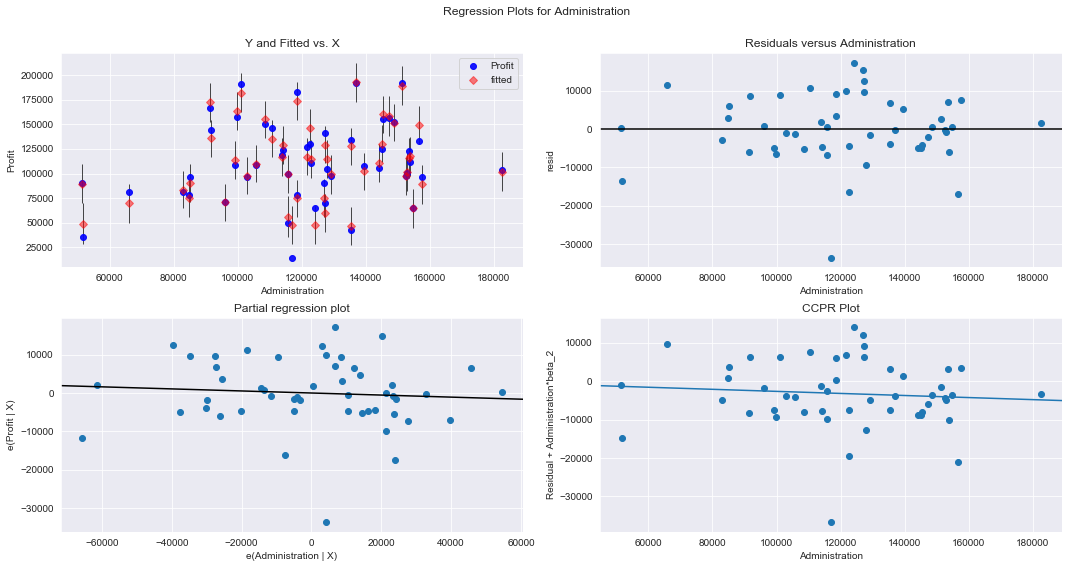

In [118]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

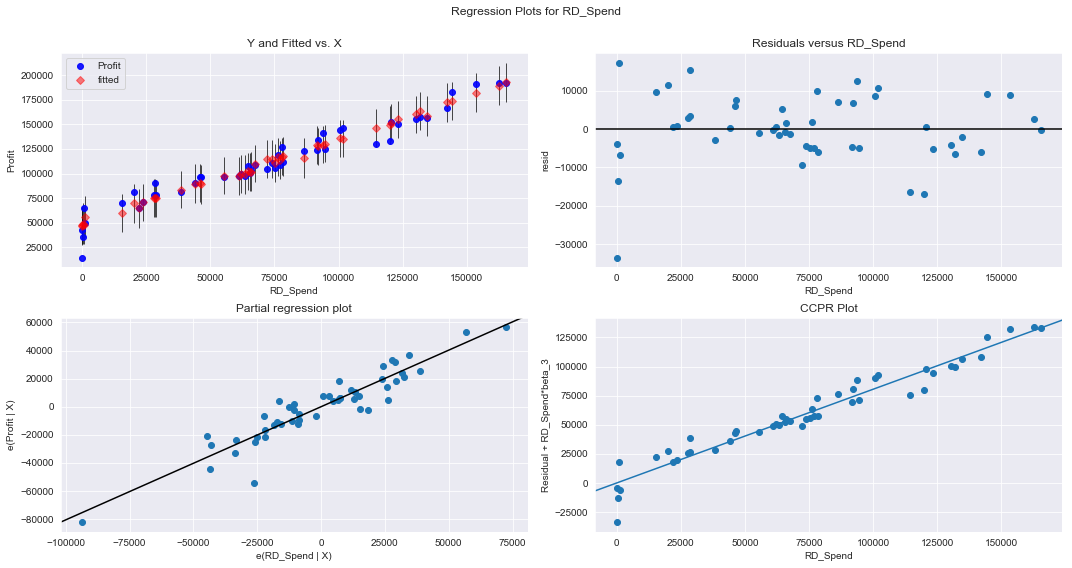

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

In [120]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

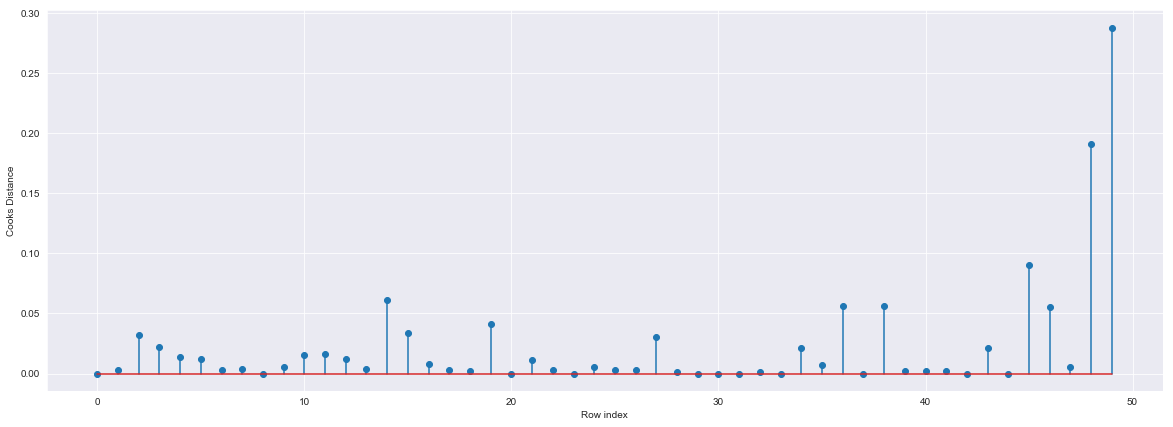

In [121]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(c)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [122]:
np.argmax(c),np.max(c)

(49, 0.2880822927543262)

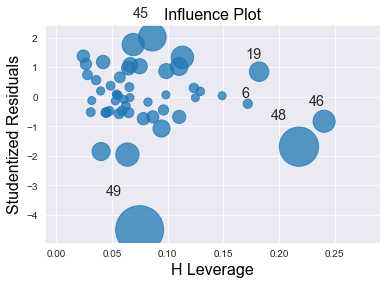

In [123]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [124]:
data2[data2.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [125]:
data2.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [126]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data3=data2.drop(data2.index[[49]],axis=0).reset_index()

In [127]:
data3.tail()

,index,RD_Spend,Administration,Marketing_Spend,State,Profit
44,44,22177.74,154806.14,28334.72,California,65200.33
45,45,1000.23,124153.04,1903.93,New York,64926.08
46,46,1315.46,115816.21,297114.46,Florida,49490.75
47,47,0.00,135426.92,0.00,California,42559.73
48,48,542.05,51743.15,0.00,New York,35673.41


In [128]:
data4=data3.drop(['index'],axis=1)

In [129]:
data4

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [130]:
model1 = smf.ols('Profit~Marketing_Spend+Administration+RD_Spend',data=data4).fit()

In [131]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           8.85e-32
Time:                        14:08:38   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
RD_Spend            0.7830      0.038     20.470      0.000       0.706       0.860
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
model1_influence = model1.get_influence()
(d, _) = model1_influence.cooks_distance

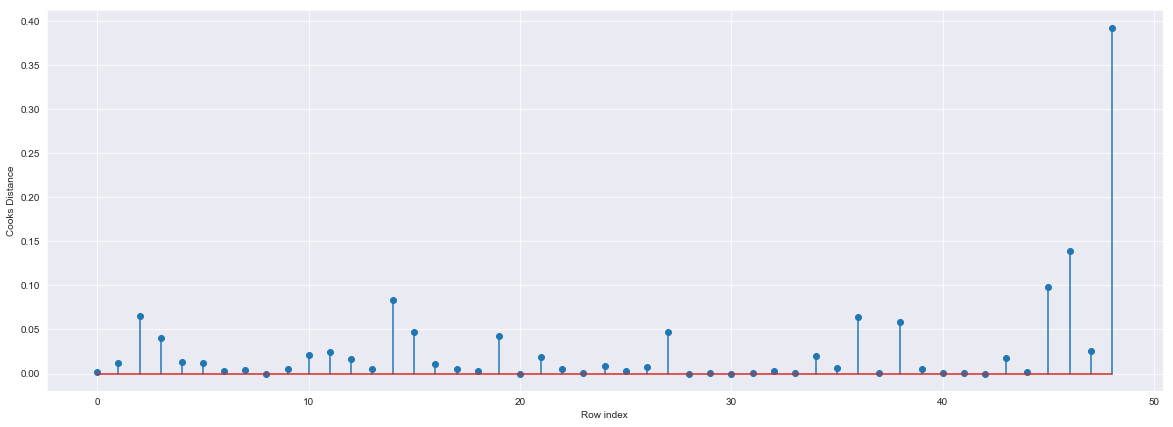

In [133]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(d)), np.round(d, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
data4.shape

(49, 5)

In [135]:
3*((3+1)/data4.shape[0])

0.24489795918367346

In [136]:
np.argmax(d),np.max(d)

(48, 0.3927442055632136)

In [137]:
data4[data4.index.isin([48])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [138]:
data5=data4.drop(data4.index[[48]],axis=0).reset_index()

In [139]:
data5 = data5.drop(['State'],axis=1)

In [140]:
data5.tail()

,index,RD_Spend,Administration,Marketing_Spend,Profit
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75
47,47,0.00,135426.92,0.00,42559.73


In [141]:
data5 = data5.drop(['index'],axis=1)

In [142]:
data5

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [143]:
model2 = smf.ols('Profit~Marketing_Spend+Administration+RD_Spend',data=data5).fit()

In [144]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.03e-31
Time:                        14:08:39   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
RD_Spend            0.7895      0.036     21.718      0.000       0.716       0.863
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
final_model = model2

In [146]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.03e-31
Time:                        14:08:40   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
RD_Spend            0.7895      0.036     21.718      0.000       0.716       0.863
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
test_data=data5.iloc[33:45,:3]

In [148]:
actual_values = data5.iloc[33:45,3:].values

In [149]:
actual_values

array([[96778.92],
       [96712.8 ],
       [96479.51],
       [90708.19],
       [89949.14],
       [81229.06],
       [81005.76],
       [78239.91],
       [77798.83],
       [71498.49],
       [69758.98],
       [65200.33]])

In [150]:
pred_values = final_model.predict(test_data).values

In [151]:
pred_values

array([100008.33434856,  89323.2954028 ,  93510.86009134,  77077.51666719,
        93971.55343735,  74021.94644148,  87240.00592956,  77209.48129459,
        78532.18433478,  74169.8330406 ,  63870.99686887,  67279.61092272])